In [ ]:
using DelimitedFiles

start_idx = 450
end_idx = 3000

300

In [16]:
loaded_data = readdlm("data/original_data.txt")
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

300×7 Matrix{Float64}:
 14.8421  110.341    8.67584  143.421  -0.0   -0.0     88.3243
 15.2494  109.99     8.28437  143.421  -0.0   -0.0     87.9989
 16.4694  109.641    8.32225  143.421  -0.0   -0.0     87.676
 18.4961  109.292    8.42288  143.421  -0.0   -0.0     87.354
 21.3196  108.945    8.52212  143.421  -0.0   -0.0     87.0328
 24.9259  108.599    8.61999  143.421  -0.0   -0.0     86.7122
 29.2974  108.254    8.71652  143.421  -0.0   -0.0     86.3928
 34.4128  107.911    8.81173  143.421  -0.0   -0.0     86.0765
 40.2468  107.569    8.90563  143.421  -0.0   -0.0     85.7851
 46.7708  107.228    8.99826  143.421  -0.0   -0.0     85.4833
  ⋮                                            ⋮       
 14.1869   99.0932  13.8337   136.869  -0.0  294.484   76.7545
 14.3719   98.7882  14.2372   138.719  -0.0  254.772   76.4583
 14.5201   98.4843  14.1619   140.201  -0.0  182.219   76.1623
 14.5983   98.1816  13.6822   140.983  -0.0   83.4075  75.8682
 14.6068   97.8801  13.06     141.068  -0

In [17]:
loaded_data = readdlm("data/pinn_data.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]
# pinn_data[:, 6] .= 1.0

300×7 Matrix{Float64}:
  5.32064  73.8341  5.62064  127.52   0.0172501  49.9985      61.4536
  5.64411  73.4715  5.63795  127.74   0.0172501  -0.00538086  61.1113
  6.61007  73.1109  5.67501  127.74   0.0172501  -0.00538086  60.753
  8.21239  72.7524  5.71185  127.739  0.0172501  -0.00538086  60.3969
 10.4446   72.396   5.74847  127.739  0.0172501  -0.00538086  60.0429
 13.2969   72.0418  5.78488  127.739  0.0172501  -0.00538086  59.6909
 16.756    71.6896  5.82107  127.739  0.0172501  -0.00538086  59.341
 20.8057   71.3394  5.85705  127.739  0.0172501  -0.00538086  58.9931
 25.4267   70.9914  5.89282  127.739  0.0172501  -0.00538086  58.6473
 30.597    70.6453  5.92838  127.739  0.0172501  -0.00538086  58.3035
  ⋮                                               ⋮           
  5.91612  86.2305  6.25838  106.497  0.0203583  57.0376      72.047
  5.92655  85.8053  6.26746  106.878  0.0203583  56.8127      71.6558
  5.93686  85.3825  6.27643  107.257  0.0203583  56.5891      71.2667
  5.947

In [18]:
loaded_data = readdlm("data/simple_data.txt")
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]
# simple_data[:, 6] .= 1.0

300×7 Matrix{Float64}:
  4.40706  65.8357  4.66641  147.055   2.5099e-6   43.2254     55.1075
  4.67765  65.5104  4.68225  147.249   2.5099e-6    0.766692   54.8001
  5.47167  65.187   4.71547  147.249   2.5099e-6    1.3387e-5  54.4788
  6.79072  64.8654  4.7485   147.249   2.5099e-6    1.3387e-5  54.1594
  8.62831  64.5458  4.78134  147.249   2.5099e-6    1.3387e-5  53.8418
 10.9754   64.228   4.81398  147.249   2.5099e-6    1.3387e-5  53.5261
 13.8206   63.9121  4.84644  147.249   2.5099e-6    1.3387e-5  53.2123
 17.1498   63.598   4.8787   147.249   2.5099e-6    1.3387e-5  52.9003
 20.9468   63.2858  4.91077  147.249   2.5099e-6    1.3387e-5  52.5901
 25.1929   62.9754  4.94266  147.249   2.5099e-6    1.3387e-5  52.2817
  ⋮                                                 ⋮          
  4.33281  68.4374  4.60335  144.809  -5.00582e-6  45.0893     57.5081
  4.34184  68.0979  4.61088  145.11   -5.00582e-6  44.8408     57.1955
  4.35081  67.7602  4.61837  145.409  -5.00582e-6  44.5941   

In [12]:
using Statistics

# simple_data1 = simple_data[:, 1:4]
# original_data1 = original_data[:, 1:4]

mean(abs2, simple_data .- original_data)

3010.5453458927946

In [14]:
u0 = [6.0, 6.0, 6.0, 200.0, 0.0, 0.0, 0.0]
u = u0[[1,4]]

2-element Vector{Float64}:
   6.0
 200.0

In [19]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

plot_differences (generic function with 1 method)

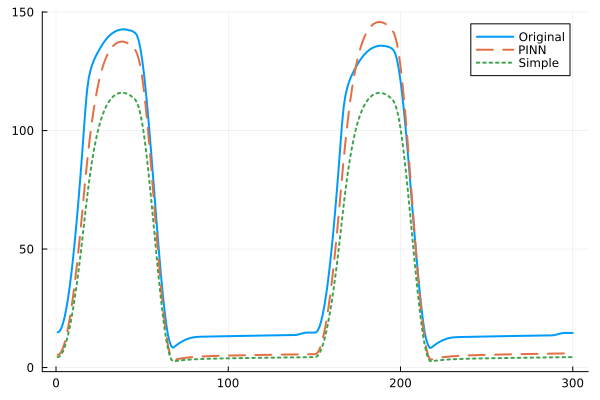

In [20]:
plot_differences(1)

In [22]:
function plot_diff_layout()
    layout = @layout [a b c; d e f; g e f]

    plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7),
        layout = layout,
        size = (1000, 800)
    )
end

plot_diff_layout (generic function with 1 method)

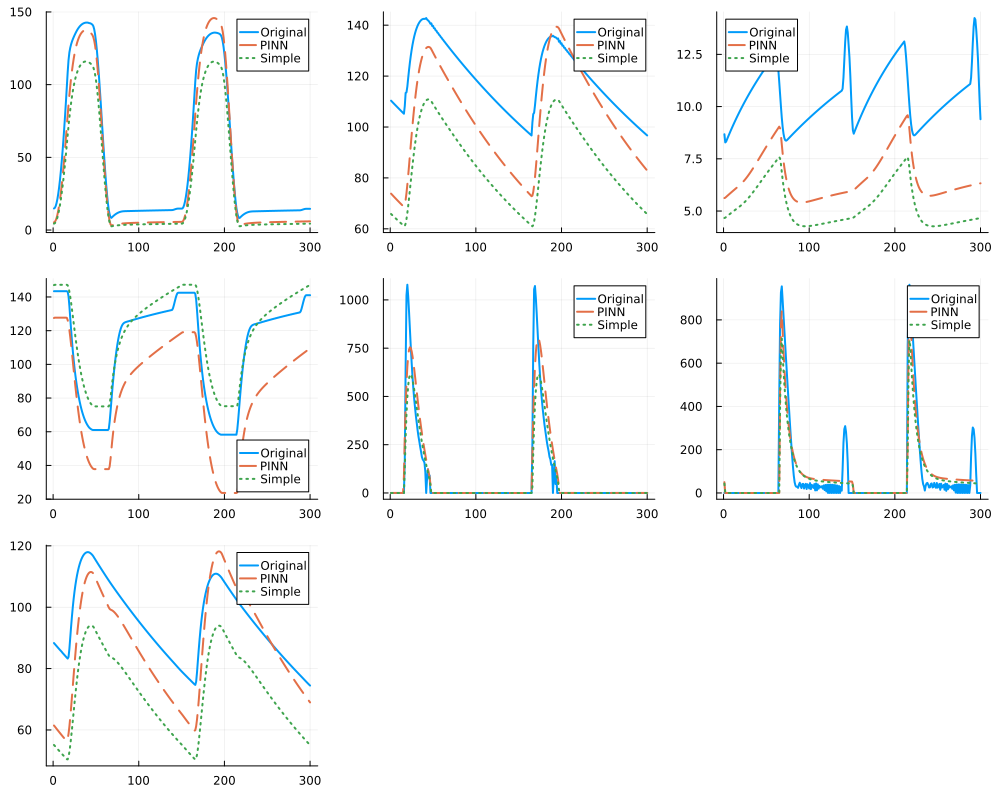

In [23]:
plot_diff_layout()